<img title="GitHub Octocat" src='./img/Octocat.jpg' style='height: 60px; padding-right: 15px' alt="Octocat" align="left"> This notebook is part of a GitHub repository: https://github.com/pessini/moby-bikes 
<br>MIT Licensed
<br>Author: Leandro Pessini

# <p style="font-size:100%; text-align:left; color:#444444;">Exploratory Data Analysis (EDA)</p>

# <p style="font-size:100%; text-align:left; color:#444444;">Table of Contents:</p>
* [1. Datasets](#1)
  * [1.1 Rentals Data - Moby Bikes](#1.1)
  * [1.2 Weather Data - Met Éireann](#1.2)
* [2. Preprocessing & Feature Engineering](#2)
  * [2.1 Target variable distribution](#2.1)
  * [2.2 Missing values](#2.2)
  * [2.3 Exploratory Analysis](#2.3)
  * [2.4 Features Importance](#2.4)

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

%matplotlib inline

In [101]:
hourly_data = pd.read_csv('../data/processed/hourly_data.csv')
all_data = pd.read_csv('../data/processed/all_data.csv')
rentals = pd.read_csv('../data/interim/new_features_rentals.csv')
hourly_data.head()

,rental_date,rental_hour,rental_day,rental_month,rental_year,holiday,dayofweek_n,dayofweek,working_day,season,peak,timesofday,temp,rhum,wdsp,rain_type,count
0,2021-03-01,2,1,3,2021,False,0,Monday,True,Winter,False,Night,-1.2,98,4,no rain,1
1,2021-03-01,7,1,3,2021,False,0,Monday,True,Winter,True,Morning,2.1,100,4,no rain,3
2,2021-03-01,8,1,3,2021,False,0,Monday,True,Winter,True,Morning,5.1,98,5,no rain,1
3,2021-03-01,9,1,3,2021,False,0,Monday,True,Winter,True,Morning,5.7,98,5,no rain,4
4,2021-03-01,10,1,3,2021,False,0,Monday,True,Winter,True,Morning,6.7,94,6,no rain,4


In [102]:
hourly_data[['temp','wdsp','rhum','count']].describe()

,temp,wdsp,rhum,count
count,6966.000000,6966.00000,6966.000000,6966.000000
mean,10.742392,8.81137,80.545937,4.754378
std,5.002159,4.38365,11.918729,3.442080
min,-4.000000,1.00000,24.000000,1.000000
25%,7.025000,6.00000,73.000000,2.000000
50%,10.600000,8.00000,82.000000,4.000000
75%,14.500000,11.00000,90.000000,7.000000
max,26.300000,35.00000,100.000000,26.000000


In [103]:
hourly_data = hourly_data.astype({'holiday': 'category', 
                                  'dayofweek': 'category', 
                                  'working_day': 'category',
                                  'season': 'category', 
                                  'peak': 'category', 
                                  'rain_type': 'category', 
                                  'timesofday': 'category'
                                  })

In [104]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6966 entries, 0 to 6965
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   rental_date   6966 non-null   object  
 1   rental_hour   6966 non-null   int64   
 2   rental_day    6966 non-null   int64   
 3   rental_month  6966 non-null   int64   
 4   rental_year   6966 non-null   int64   
 5   holiday       6966 non-null   category
 6   dayofweek_n   6966 non-null   int64   
 7   dayofweek     6966 non-null   category
 8   working_day   6966 non-null   category
 9   season        6966 non-null   category
 10  peak          6966 non-null   category
 11  timesofday    6966 non-null   category
 12  temp          6966 non-null   float64 
 13  rhum          6966 non-null   int64   
 14  wdsp          6966 non-null   int64   
 15  rain_type     6966 non-null   category
 16  count         6966 non-null   int64   
dtypes: category(7), float64(1), int64(8), object(1)
memo

In [105]:
hourly_data[['holiday','dayofweek','working_day','season','peak','timesofday','rain_type']].describe()

,holiday,dayofweek,working_day,season,peak,timesofday,rain_type
count,6966,6966,6966,6966,6966,6966,6966
unique,2,7,2,4,2,4,5
top,False,Saturday,True,Summer,False,Afternoon,no rain
freq,6684,1031,4722,1847,4634,2132,6325


In [106]:
profile = ProfileReport(hourly_data, title='Hourly Data', html={'style':{'full_width':True}})
profile.to_file(output_file='../reports/hourly_data_report.html')
# to_notebook_iframe() will print in the jupyter notebook's cell
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Rentals by Season

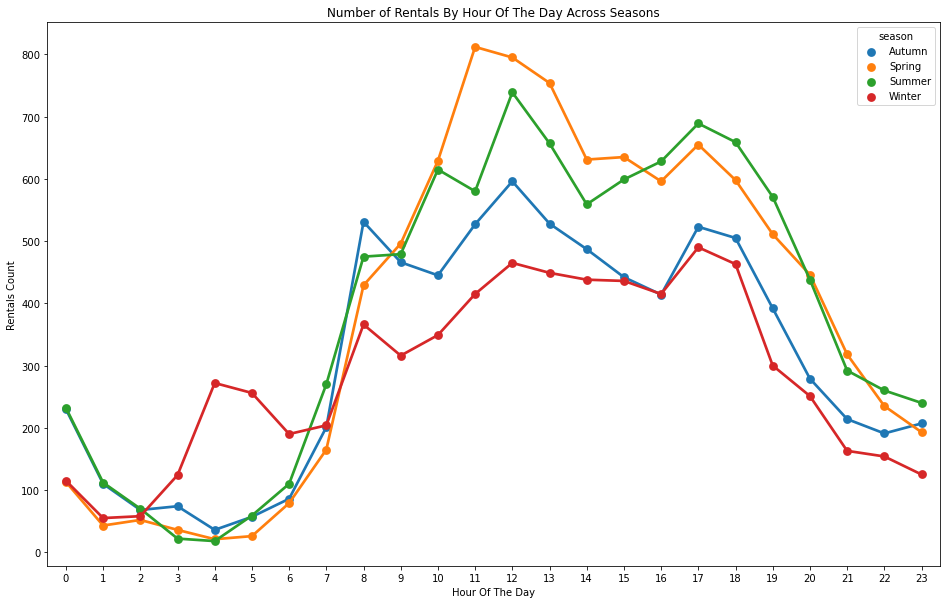

In [107]:
season_freq = hourly_data.groupby(['season', 'rental_hour'])['count'].agg('sum').reset_index(name='count')
fig, ax = plt.subplots(figsize=(16, 10))
sns.pointplot(x=season_freq["rental_hour"], y=season_freq["count"], hue=season_freq["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', title="Number of Rentals By Hour Of The Day Across Seasons")
plt.show()

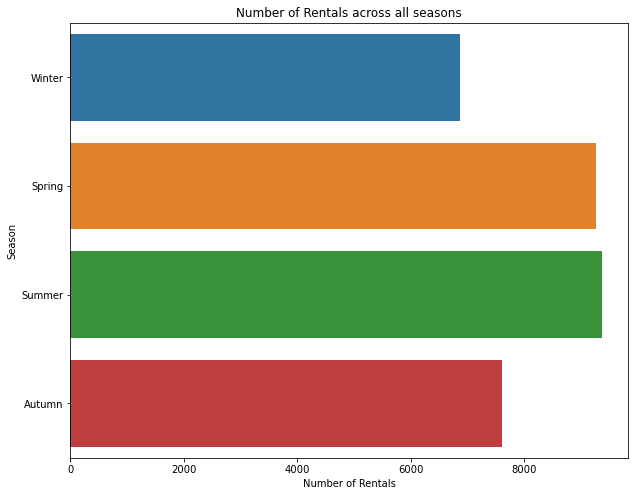

In [108]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=season_freq.groupby('season')['count'].sum().reset_index(), x='count', y='season', order=['Winter','Spring','Summer','Autumn'], ci=None)
ax.set(xlabel='Number of Rentals', ylabel='Season', title='Number of Rentals across all seasons')
plt.show()

### Rentals by Days of the Week

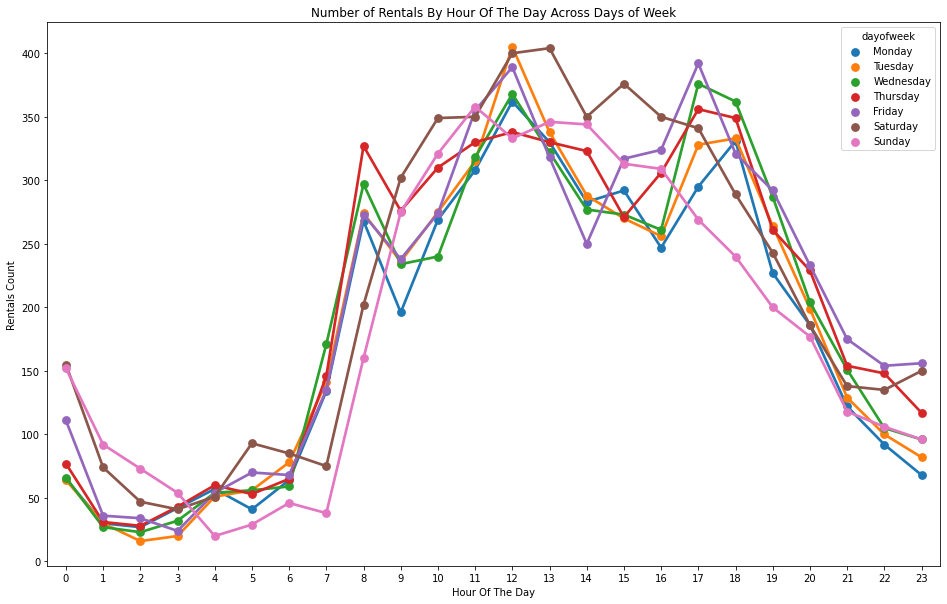

In [109]:
day_of_week = hourly_data.groupby(['dayofweek', 'rental_hour'])['count'].agg('sum').reset_index(name='count')
fig, ax = plt.subplots(figsize=(16, 10))
sns.pointplot(x=day_of_week["rental_hour"], 
              y=day_of_week["count"], 
              hue=day_of_week["dayofweek"], 
              ax=ax,
              hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', title="Number of Rentals By Hour Of The Day Across Days of Week")
plt.show()

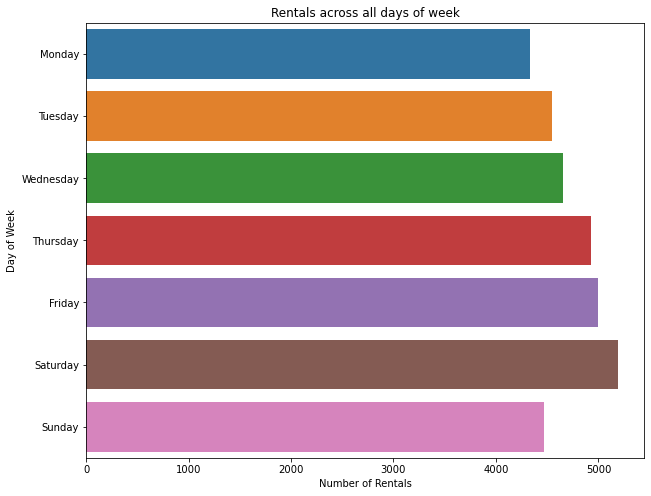

In [110]:
day_of_week = hourly_data.groupby('dayofweek')['count'].agg('sum').reset_index(name='count')
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=day_of_week, x='count', y='dayofweek', ci=None, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel='Number of Rentals', ylabel='Day of Week', title='Rentals across all days of week')
plt.show()

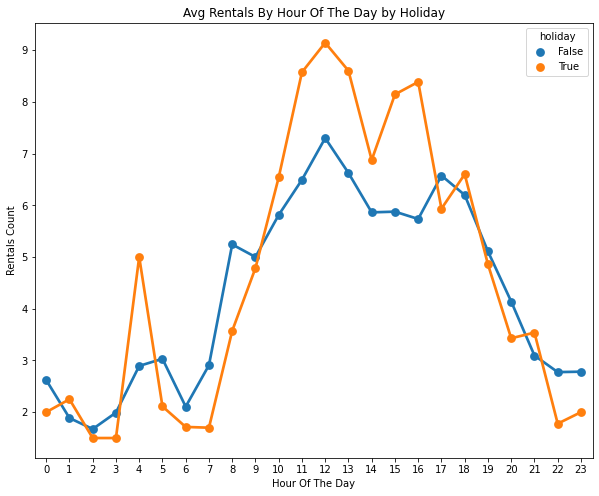

In [111]:
hourly_count = hourly_data.groupby(['rental_hour','holiday'])['count'].agg('mean').reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(x=hourly_count['rental_hour'], y=hourly_count['count'], hue=hourly_count['holiday'], ax=ax)
ax.set(xlabel='Hour Of The Day', 
       ylabel='Rentals Count', 
       title="Avg Rentals By Hour Of The Day by Holiday")
plt.show()

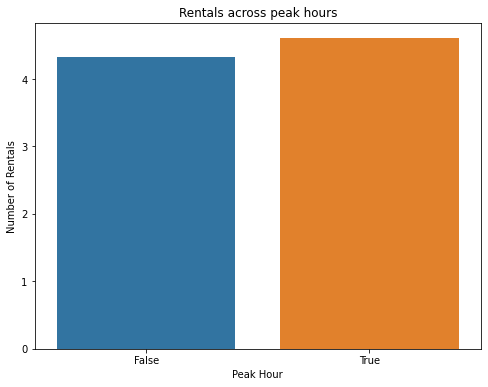

In [112]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=hourly_count, x='holiday', y='count', ci=None)
ax.set(xlabel='Peak Hour', ylabel='Number of Rentals', title='Rentals across peak hours')
plt.show()

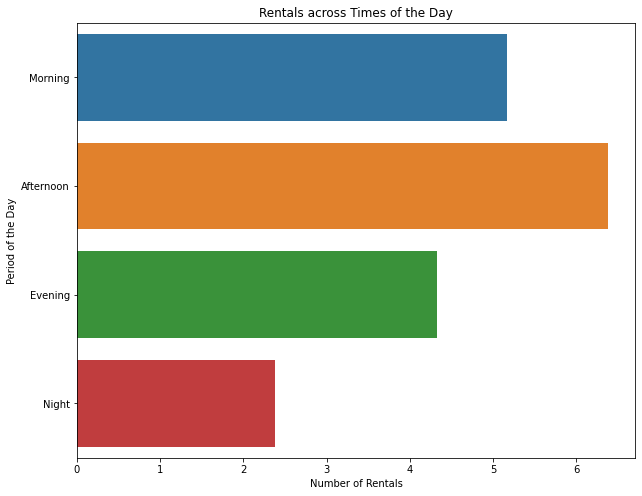

In [113]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=hourly_data, x='count', y='timesofday', ci=None, order=['Morning','Afternoon','Evening','Night'])
ax.set(xlabel='Number of Rentals', ylabel='Period of the Day', title='Rentals across Times of the Day')
plt.show()

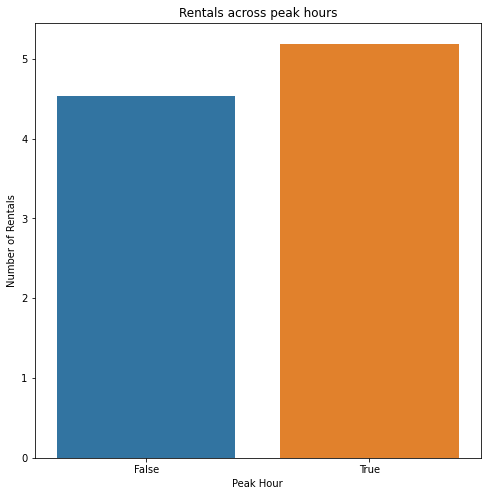

In [114]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(data=hourly_data, x='peak', y='count', ci=None)
ax.set(xlabel='Peak Hour', ylabel='Number of Rentals', title='Rentals across peak hours')
plt.show()

## Monthly Data

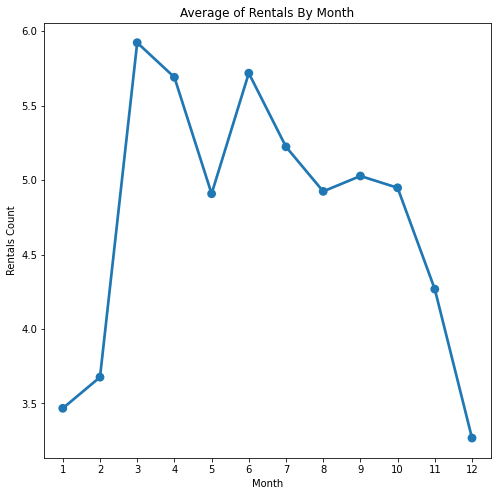

In [115]:
monthly_data = hourly_data.groupby('rental_month')['count'].agg('mean').reset_index(name='count')
# day_of_week['dayofweek'] = day_of_week['dayofweek'].map(lambda d : day_of_week_map[d])
fig, ax = plt.subplots(figsize=(8, 8))
sns.pointplot(x=monthly_data["rental_month"], 
              y=monthly_data["count"], 
              ax=ax)
ax.set(xlabel='Month', ylabel='Rentals Count', title="Average of Rentals By Month")
plt.show()

## Battery distribution

In [116]:
battery_dist = all_data.copy()

def group_battery_status(df):

    bins= [0,30,50,80,100]
    labels = ['< 30%','30% - 50%','50% - 80%','> 80%']
    battery_dist['battery_status'] = pd.cut(battery_dist['start_battery'], bins=bins, labels=labels, right=False)

    s = battery_dist.battery_status
    counts = s.value_counts()
    percent = s.value_counts(normalize=True)
    percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    return pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}, labels)

In [117]:
group_battery_status(battery_dist)

,counts,per,per100
< 30%,2509,0.076862,7.7%
30% - 50%,5767,0.176669,17.7%
50% - 80%,14290,0.437766,43.8%
> 80%,10077,0.308703,30.9%


<AxesSubplot:xlabel='start_battery', ylabel='Count'>

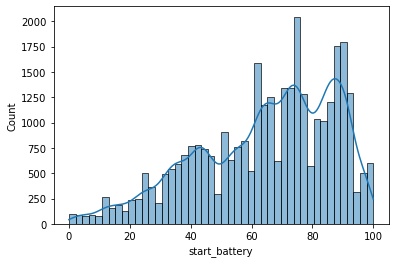

In [118]:
sns.histplot(data=rentals, x='start_battery', kde=True)

In [119]:
print(f"Mean of rentals duration: {round(all_data['duration'].mean(), 2)} minutes")

Mean of rentals duration: 958.96 minutes


## BoxPlot analysis

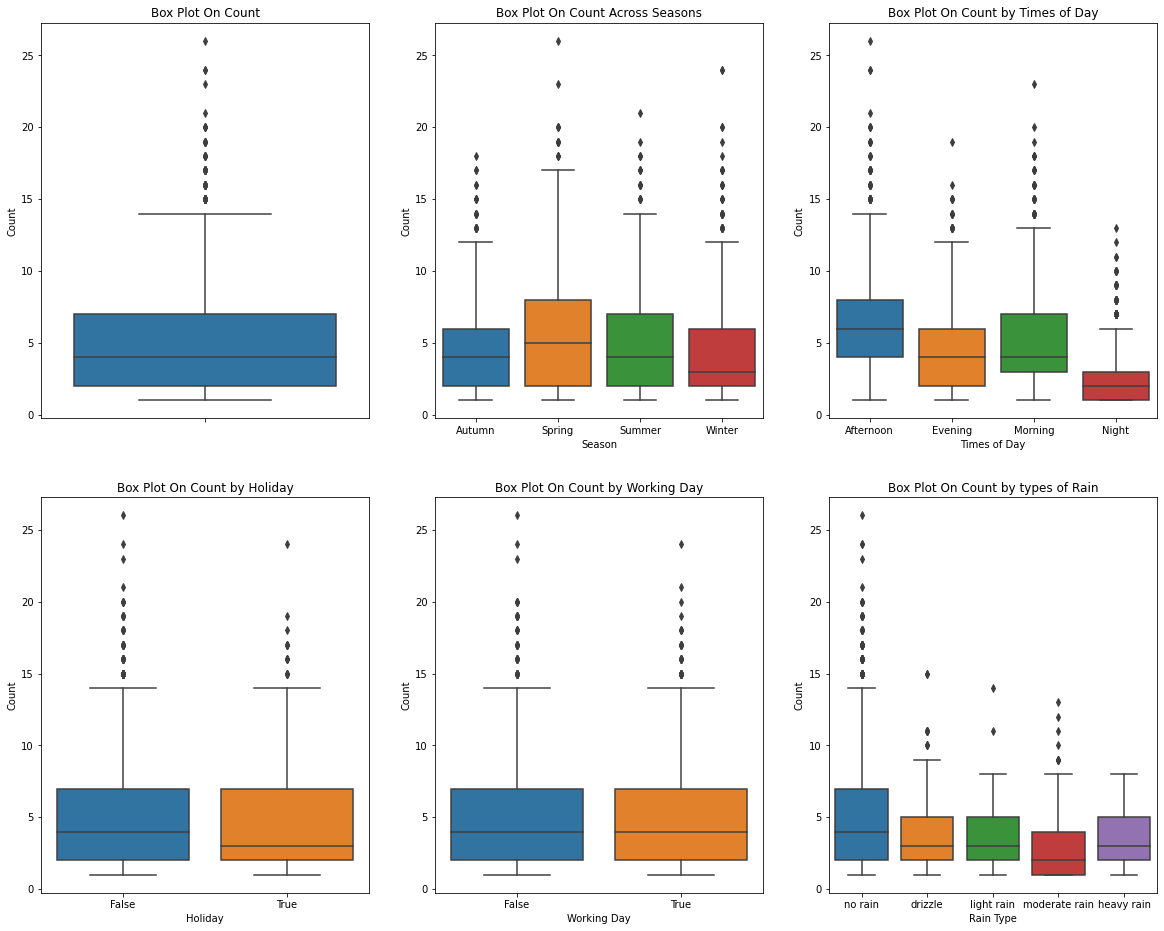

In [120]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20, 16)
sns.boxplot(data=hourly_data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=hourly_data,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=hourly_data,y="count",x="holiday",orient="v",ax=axes[1][0])
sns.boxplot(data=hourly_data,y="count",x="working_day",orient="v",ax=axes[1][1])
sns.boxplot(data=hourly_data,y="count",x="timesofday",orient="v",ax=axes[0][2])
sns.boxplot(data=hourly_data,y="count",x="rain_type",orient="v",ax=axes[1][2], order=['no rain', 'drizzle', 'light rain', 'moderate rain', 'heavy rain'])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Seasons")
axes[1][0].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count by Holiday")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count by Working Day")
axes[0][2].set(xlabel='Times of Day', ylabel='Count',title="Box Plot On Count by Times of Day")
axes[1][2].set(xlabel='Rain Type', ylabel='Count',title="Box Plot On Count by types of Rain")

plt.show()

## Correlation Matrix

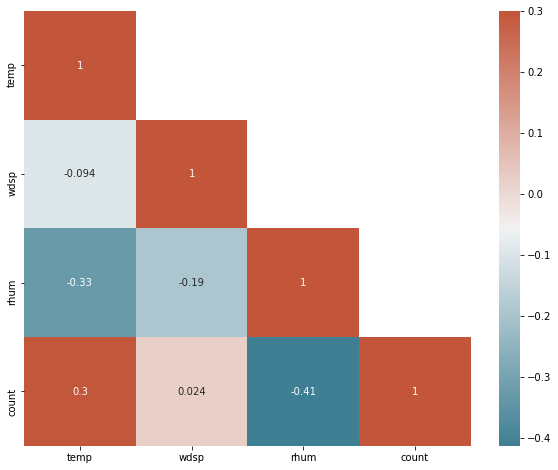

In [121]:
corrMatt = hourly_data[['temp','wdsp','rhum','count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrMatt, mask=mask,vmax=.3, annot=True, ax=ax, cmap=cmap)
plt.show()

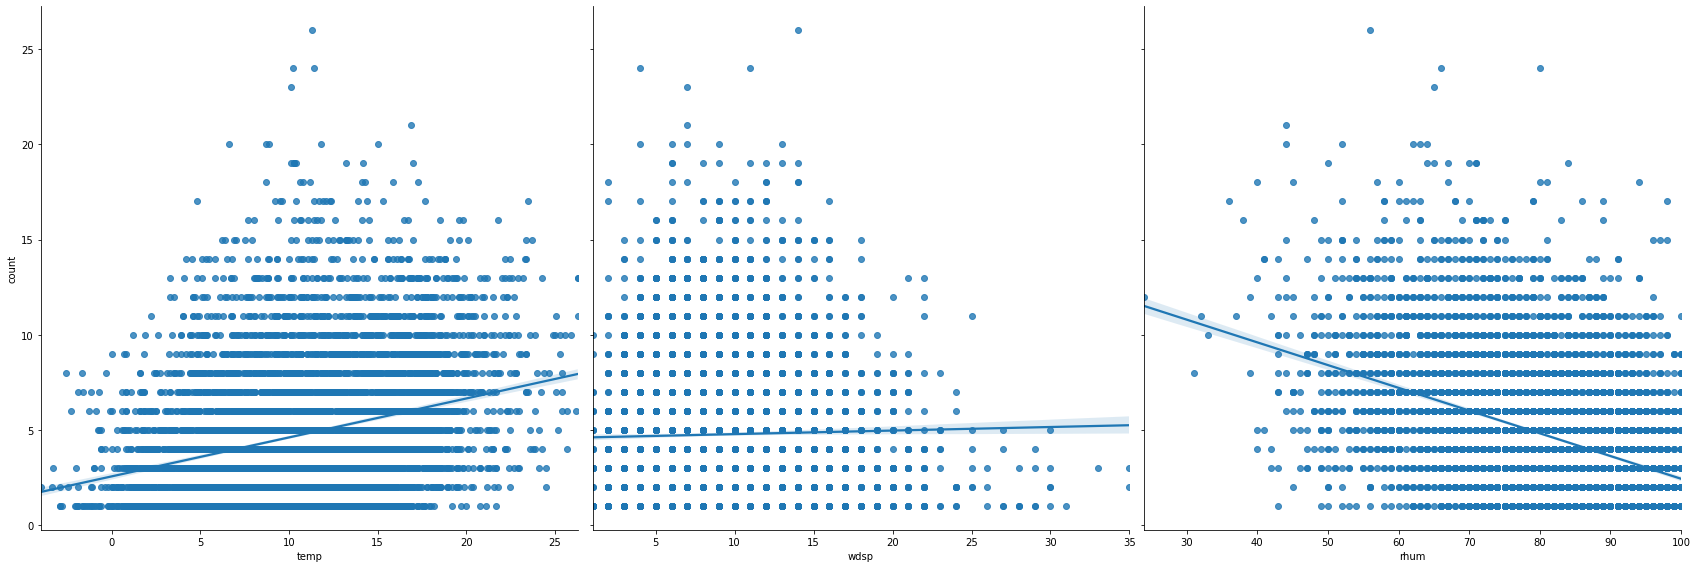

In [122]:
sns.pairplot(hourly_data, 
             x_vars=['temp','wdsp','rhum'],
             dropna=True, 
             y_vars='count', 
             height=8, 
             kind="reg", 
             palette='Set1')
plt.show()

Temperature and Relative Humidity show a strong correlation with Rentals Count and Wind Speed does not seem to be correlated with Rentals Count. 

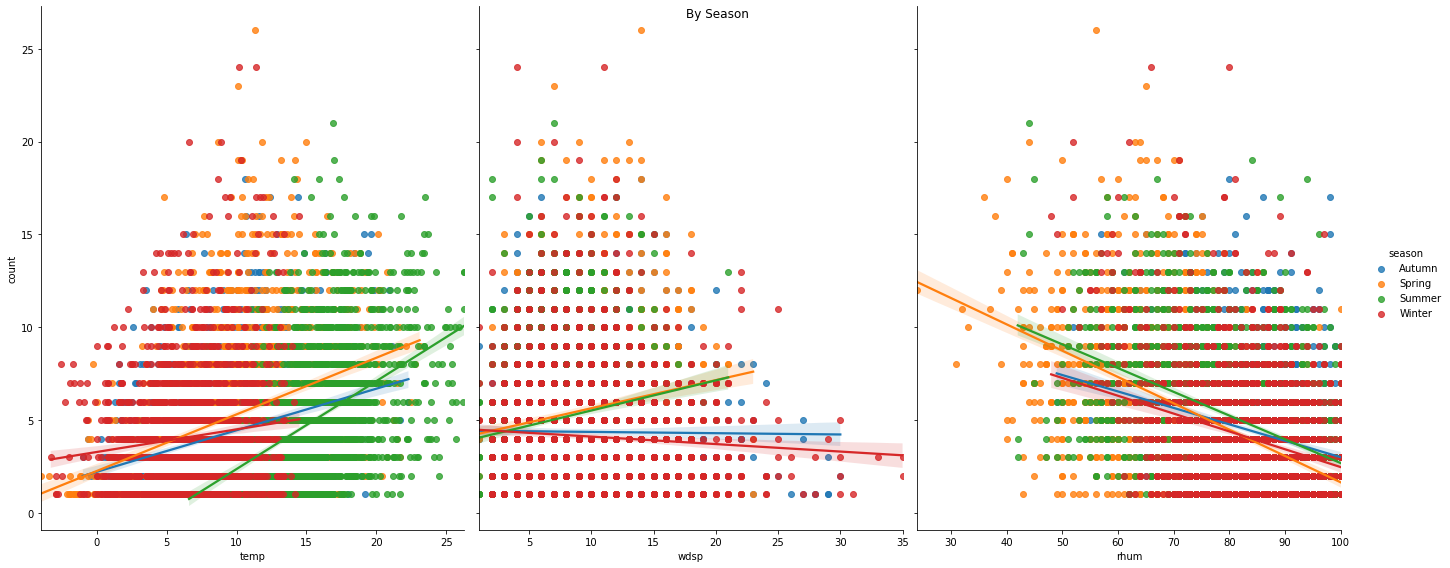

In [123]:
pp = sns.pairplot(hourly_data, 
             x_vars=['temp','wdsp','rhum'],
             dropna=True, 
             y_vars='count', height=8, aspect=0.8, kind="reg", hue='season')
pp.fig.suptitle("By Season")

plt.show()

If we plot the relationship by Season we can see that Wind Speed is correlated but depending on the Season is positive or negative. Which makes sense since on Autumn and Winter, as it is colder and temperature is normally low, the Rentals decrease as the Wind Speed increases. In the Spring and Summer because the temperature are on average higher the wind speed has a different impact (positive correlation).

## Outlier Analysis

In [124]:
hourly_data['count'].describe()

count    6966.000000
mean        4.754378
std         3.442080
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        26.000000
Name: count, dtype: float64

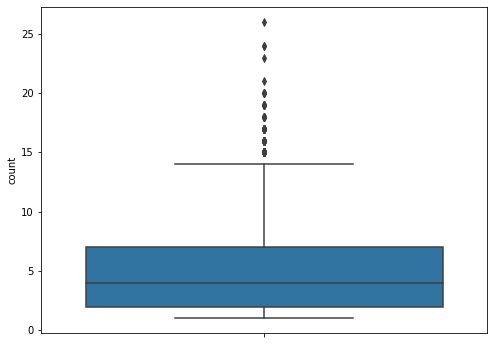

In [125]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=hourly_data,
            y="count",
            orient="v",ax=ax)
plt.show()

In [126]:
print(f"Outliers (#): {round(hourly_data[hourly_data['count'] > 14].shape[0], 2)}")
print(f"Outliers (%): {round((hourly_data[hourly_data['count'] > 14].shape[0] / hourly_data.shape[0])*100, 2)}%")

Outliers (#): 93
Outliers (%): 1.34%


In [127]:
# hourlyDataOutliers = hourly_data[hourly_data['count'] > 15]
hourlyDataOutliers = hourly_data[np.abs(hourly_data["count"]-hourly_data["count"].mean())>(2*hourly_data["count"].std())] 
hourlyDataWithoutOutliers = hourly_data[np.abs(hourly_data["count"]-hourly_data["count"].mean())<=(2*hourly_data["count"].std())] 

In [128]:
print(f"Outliers (#): {round(hourlyDataOutliers.shape[0], 2)}")
print(f"Outliers (%): {round((hourlyDataOutliers.shape[0] / hourly_data.shape[0])*100, 2)}%")

Outliers (#): 346
Outliers (%): 4.97%


In [129]:
hourlyDataOutliers['holiday'].value_counts(normalize=True)

False    0.916185
True     0.083815
Name: holiday, dtype: float64

In [130]:
hourlyDataOutliers['working_day'].value_counts(normalize=True)

True     0.543353
False    0.456647
Name: working_day, dtype: float64

In [131]:
hourlyDataOutliers['season'].value_counts()

Spring    138
Summer    101
Winter     54
Autumn     53
Name: season, dtype: int64

In [132]:
daily_count = hourly_data.groupby('rental_date')['count'].sum().reset_index()
daily_count_no_outliers = hourlyDataWithoutOutliers.groupby('rental_date')['count'].sum().reset_index()

In [133]:
daily_count.describe()

,count
count,364.000000
mean,90.986264
std,27.873234
min,14.000000
25%,73.000000
50%,90.000000
75%,111.000000
max,171.000000


In [134]:
print(f"Mean of daily rentals = {round(daily_count['count'].mean(), 2)}")
print(f"Mean of daily rentals without Outliers = {round(daily_count_no_outliers['count'].mean(), 2)}")

Mean of daily rentals = 90.99
Mean of daily rentals without Outliers = 77.81


In [135]:
hourlyDataOutliers = hourlyDataOutliers.join(daily_count.set_index('rental_date'), on='rental_date', lsuffix='_hour', rsuffix='_day')

In [136]:
outliers_df = hourlyDataOutliers[hourlyDataOutliers['count_day'] > 110].sort_values(by='count_day', ascending=False)
outliers_df.head()

,rental_date,rental_hour,rental_day,rental_month,rental_year,holiday,dayofweek_n,dayofweek,working_day,season,peak,timesofday,temp,rhum,wdsp,rain_type,count_hour,count_day
289,2021-03-17,14,17,3,2021,True,2,Wednesday,False,Winter,False,Afternoon,11.9,60,12,no rain,17,171
291,2021-03-17,16,17,3,2021,True,2,Wednesday,False,Winter,False,Afternoon,12.6,48,10,no rain,16,171
290,2021-03-17,15,17,3,2021,True,2,Wednesday,False,Winter,False,Afternoon,12.8,49,10,no rain,15,171
288,2021-03-17,13,17,3,2021,True,2,Wednesday,False,Winter,False,Afternoon,11.4,66,11,no rain,24,171
287,2021-03-17,12,17,3,2021,True,2,Wednesday,False,Winter,False,Afternoon,10.3,71,9,no rain,19,171


In [137]:
hourlyDataOutliers.to_csv('../data/interim/outliers.csv')

In [138]:
hourly_data[hourly_data['count'] > 20]

,rental_date,rental_hour,rental_day,rental_month,rental_year,holiday,dayofweek_n,dayofweek,working_day,season,peak,timesofday,temp,rhum,wdsp,rain_type,count
288,2021-03-17,13,17,3,2021,True,2,Wednesday,False,Winter,False,Afternoon,11.4,66,11,no rain,24
325,2021-03-19,12,19,3,2021,False,4,Friday,True,Winter,False,Afternoon,10.2,80,4,no rain,24
596,2021-04-03,11,3,4,2021,False,5,Saturday,False,Spring,False,Morning,10.1,65,7,no rain,23
850,2021-04-17,13,17,4,2021,False,5,Saturday,False,Spring,False,Afternoon,11.3,56,14,no rain,26
2089,2021-06-22,13,22,6,2021,False,1,Tuesday,True,Summer,False,Afternoon,16.9,44,7,no rain,21


In [139]:
hourlyDataWithoutOutliers = hourly_data[np.abs(hourly_data["count"]-hourly_data["count"].mean())<=(2*hourly_data["count"].std())]
profile = ProfileReport(hourlyDataOutliers, title='Hourly Data without Outliers', html={'style':{'full_width':True}})
profile.to_file(output_file='../reports/hourlyDataWithoutOutliers.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Distribution of numerical features

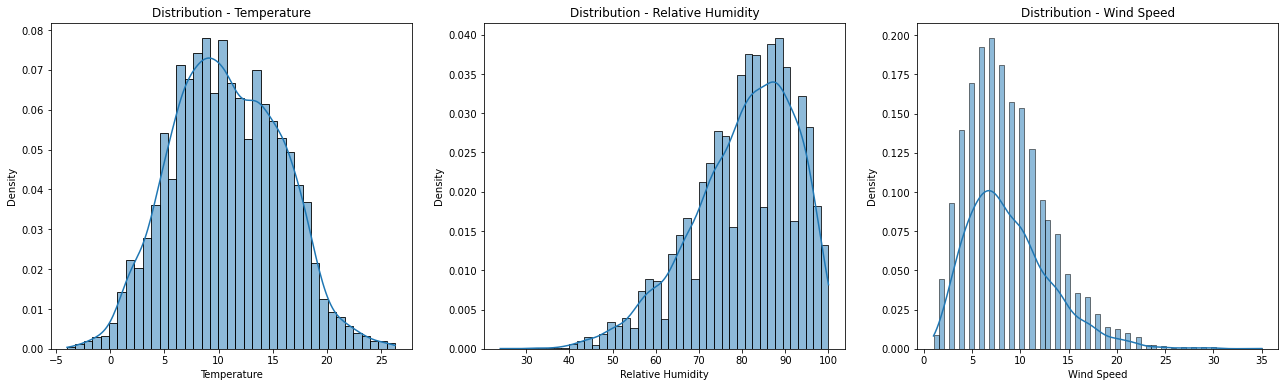

In [140]:
fig = plt.figure(figsize=(22,6))
gs = fig.add_gridspec(1, 3)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

sns.histplot(hourly_data['temp'],ax=ax0, stat='density', kde=True)
sns.histplot(hourly_data['rhum'],ax=ax1, stat='density', kde=True)
sns.histplot(hourly_data['wdsp'],ax=ax2, stat='density', kde=True)

ax0.set(xlabel='Temperature',title="Distribution - Temperature")
ax1.set(xlabel='Relative Humidity',title="Distribution - Relative Humidity")
ax2.set(xlabel='Wind Speed',title="Distribution - Wind Speed")

plt.show()

<img title="GitHub Mark" src="./img/GitHub-Mark-64px.png" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/moby-bikes) <br>Author: Leandro Pessini